# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [60]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [61]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [62]:
# Import the necessary CSVs to Pandas DataFrames
# DataFrame Dump

file_path = Path("sfo_neighborhoods_census_data.csv")
neighborhoods_coordinates_df = pd.read_csv('neighborhoods_coordinates.csv')
sfo_data = pd.read_csv(file_path, index_col="year")
max_units = number_of_units_df['housing_units'].max()
min_units = number_of_units_df['housing_units'].min()
units_std = number_of_units_df.std()
neighborhood_means_yearly = sfo_data.groupby([sfo_data.index,'neighborhood']).mean()
neighborhood_means_yearly.reset_index(inplace=True)
neighborhood_means_yearly.columns = ['year','neighborhood','avg_px_sqr_foot','housing_units','avg_rent']
neighborhood_means_yearly.set_index('year',inplace=True)
neighborhood_mean = sfo_data.groupby('neighborhood').mean()
neighborhood_mean.drop(columns =['housing_units','gross_rent'],inplace=True)
neighborhood_mean.sort_values(by='sale_price_sqr_foot',ascending=False,inplace=True)
top_10_mean = neighborhood_mean[0:10]
avg_ppsf_and_rent = sfo_data.groupby(sfo_data.index).mean()
avg_ppsf_and_rent.drop(columns=['housing_units'],inplace=True)
avg_ppsf_and_rent.columns = ['avg_px_sqr_foot','avg_rent']


In [63]:
number_of_units_df = sfo_data.groupby('year').mean()
number_of_units_df.drop(columns=['gross_rent','sale_price_sqr_foot'],inplace=True)

In [64]:
# COMMENTED OUT MAP PLOT, TROUBLESHOOTING
# neighborhoods_coordinates_df.reset_index()
# neighborhoods_coordinates_df['Neighborhood'] = neighborhoods_coordinates_df['Neighborhood'].str.strip()
# neighborhoods_coordinates_df.set_index('Neighborhood',inplace=True)
# neighborhoods_coordinates_df

In [65]:
# a = list(neighborhoods_coordinates_df.index)

In [66]:
# neighborhood_mean = sfo_data.groupby('neighborhood').mean()
# neighborhood_mean.reset_index(inplace=True)
# neighborhood_mean['neighborhood'] = neighborhood_mean['neighborhood'].str.strip()
# neighborhood_mean.set_index('neighborhood',inplace=True)
# neighborhood_mean

In [67]:
#b = list(neighborhood_mean.index)

In [68]:
#[x for x in a if x not in b]

In [69]:
#[x for x in b if x not in a]

In [70]:
#len(set(b)),len(b)

In [71]:
# i=0
# for i in range(0,len(b)):  
#     value = b[i]
#     value
#     b.count(value)
#     if b.count(value) >1:
#         print(value)

In [72]:
# neighborhood_mean.loc['Bernal Heights']

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [73]:
# # Define Panel Visualization Functions
def housing_units_per_year():
    hsg_units_chart = number_of_units_df.plot.bar(ylim=(min_units-1000,max_units+1000),
                            title="Housing Units in San Francisco from 2010 to 2016",
                            ylabel='Housing Units',
                            legend=False)
    return hsg_units_chart


def average_gross_rent():
    average_ppsf_chart = avg_ppsf_and_rent['avg_rent'].hvplot(title='Average Rent by Year',ylabel='Price per SqFt',color='green')
    return average_ppsf_chart


def average_sales_price():
    average_sales_chart = avg_ppsf_and_rent['avg_px_sqr_foot'].hvplot(title='Average Price per Square Foot by Year',ylabel='Price per SqFt',color='red')
    return average_sales_chart


def average_price_by_neighborhood():
    return neighborhood_means_yearly.hvplot.line(y='avg_rent', groupby='neighborhood', widget_location='left_top')


def top_most_expensive_neighborhoods():
    top_10_chart = top_10_mean.hvplot.bar(rot=45)
    return top_10_chart


def most_expensive_neighborhoods_rent_sales():  
    expensive_rent_sales = neighborhood_means_yearly.hvplot.bar(y=('avg_px_sqr_foot','avg_rent'),groupby='neighborhood',widget_location='right_top',rot=90)
    return expensive_rent_sales
    
    

# def neighborhood_map():
# Cannot get the data to import properly. neighborhood_mean DataFrame is pulling in 74 rows instead of 73....
#     map_1 = px.scatter_mapbox(
#         combined_df,
#         lat="Lat",
#         lon="Lon",
#         color='gross_rent',
#         size='sale_price_sqr_foot'
# )
#     return map_1.show()

# # def parallel_coordinates():
#     """Parallel Coordinates Plot."""

#     # YOUR CODE HERE!



# def parallel_categories():
#     """Parallel Categories Plot."""
    
#     # YOUR CODE HERE!

# def sunburst():
#     """Sunburst Plot."""
    
#     # YOUR CODE HERE!


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
        [2] HoloViews(Curve)
        [3] HoloViews(Curve)
    [1] Row
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
            [1] HoloViews(DynamicMap, widget_location='left_top')
    [2] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [2] HoloViews(Bars)

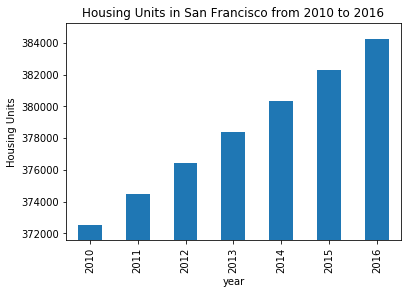

In [74]:
# Create a Title for the Dashboard
dashboard_title = "# This is my First Dashboard"

column = pn.Column('Number of Housing Units per Year',
            housing_units_per_year(),
            average_gross_rent(),
            average_sales_price()
)

row1 = pn.Row('#Average Sales/Rent by Neighborhood',
             average_price_by_neighborhood(),
)

# row2 = pn.Row('Map',
#              neighborhood_map()
# )

column1 = pn.Column(
    '#Most Expensive Neighborhoods Rent/Sales Comparison',
    most_expensive_neighborhoods_rent_sales(),
    top_most_expensive_neighborhoods()
)


# Create a tab layout for the dashboard
tabs = pn.Tabs(
    #("Map",row2),
    ("Market Value Analysis",column),
    ("Average Sales/Rent by Neighborhood", row1),
    ("Most Expensive Neighborhoods Rent/Sales Comparison",column1))

tabs


# Create the dashboard

## Serve the Panel Dashboard

In [30]:
# Serve the# dashboard
tabs.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
        [2] HoloViews(Curve)
        [3] HoloViews(Curve)
    [1] Row
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
            [1] HoloViews(DynamicMap, widget_location='left_top')
    [2] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [2] HoloViews(Bars)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

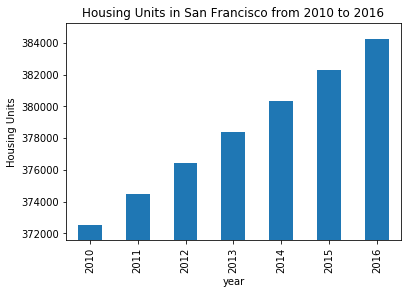

In [31]:
housing_units_per_year()

In [32]:
average_gross_rent()

:Curve   [year]   (avg_rent)

In [33]:
average_sales_price()

:Curve   [year]   (avg_px_sqr_foot)

In [34]:
average_price_by_neighborhood()

Row
    [0] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()
    [1] HoloViews(DynamicMap, widget_location='left_top')

In [35]:
top_most_expensive_neighborhoods()

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [36]:
most_expensive_neighborhoods_rent_sales()

Row
    [0] HoloViews(DynamicMap)
    [1] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()

In [37]:
neighborhood_map().show()

NameError: name 'combined_df' is not defined

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()